# Graphing Best Crew Members to Hire
---
- In this notebook we outline how to merge different dfs in order 
  to get different types of information that either df's do not have. 
- For this example, we are seeing which crew members are associated 
  with higher grossing income for the world-wide movie market. 
- We then plot the results. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import matplotlib.style as style
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/Kkies/movie-market-analysis/kyle_wip/movies_and_crew.csv'
m_c = pd.read_csv(url)
m_c.head()

,Unnamed: 0,imdb_title_id,ordering,imdb_name_id,category,name,title
0,48812,tt0054724,1,nm0431499,actor,William Joyce,Zombie
1,48813,tt0054724,2,nm0382038,actress,Heather Hewitt,Zombie
2,48814,tt0054724,3,nm0185341,actor,Walter Coy,Zombie
3,48815,tt0054724,4,nm0822948,actor,Dan Stapleton,Zombie
4,48816,tt0054724,5,nm0855096,director,Del Tenney,Zombie


In [3]:
# drop columns 
m_c.drop(columns=['Unnamed: 0', 'title'], inplace = True)

In [4]:
url = 'https://raw.githubusercontent.com/Kkies/movie-market-analysis/kyle_wip/movies_budget_revenue.csv'
b_r = pd.read_csv(url)
b_r.head()

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,13781,tt0065421,The AristoCats,The AristoCats,1970,1971-07-02,"Animation, Adventure, Comedy",78,USA,English,...,"Phil Harris, Eva Gabor, Sterling Holloway, Sca...","With the help of a smooth talking tomcat, a fa...",7.1,85509,4000000.0,35452658.0,35459543.0,66.0,125.0,109.0
1,13798,tt0065462,Beneath the Planet of the Apes,Beneath the Planet of the Apes,1970,1970-07-24,"Action, Adventure, Sci-Fi",95,USA,English,...,"James Franciscus, Kim Hunter, Maurice Evans, L...",The sole survivor of an interplanetary rescue ...,6.1,39595,3000000.0,18999718.0,18999718.0,46.0,168.0,64.0
2,13993,tt0065988,Little Big Man,Little Big Man,1970,1971-07-30,"Adventure, Comedy, Drama",139,USA,English,...,"Dustin Hoffman, Faye Dunaway, Chief Dan George...","Jack Crabb, looking back from extreme old age,...",7.6,31084,15000000.0,31559552.0,31559552.0,63.0,119.0,58.0
3,14003,tt0066011,Love Story,Love Story,1970,1971-04-16,"Drama, Romance",100,USA,English,...,"Ali MacGraw, Ryan O'Neal, John Marley, Ray Mil...",A boy and a girl from different backgrounds fa...,6.9,27788,2200000.0,106397186.0,106397186.0,84.0,167.0,50.0
4,14145,tt0066434,THX 1138,THX 1138,1971,1971-03-11,"Drama, Sci-Fi, Thriller",86,USA,English,...,"Robert Duvall, Donald Pleasence, Don Pedro Col...","In the twenty-fifth century, a time when peopl...",6.7,45363,777000.0,2437000.0,2437000.0,75.0,223.0,85.0


In [5]:
# drop columns 
b_r.drop(columns = ['Unnamed: 0', 'year', 'date_published', 'genre', 'duration', 'country',
                   'language', 'actors', 'description'], inplace = True)

In [6]:
# merging crew members, (actors/actresses, directors, composers) with their respective movie titles 
# we want the worldwide_gross_income for those movies 
new = m_c.merge(b_r[['imdb_title_id', 'worldwide_gross_income']], how='left', left_on='imdb_title_id', right_on='imdb_title_id')
new.head()

# lots of NaN values for many crew members  

,imdb_title_id,ordering,imdb_name_id,category,name,worldwide_gross_income
0,tt0054724,1,nm0431499,actor,William Joyce,NaN
1,tt0054724,2,nm0382038,actress,Heather Hewitt,NaN
2,tt0054724,3,nm0185341,actor,Walter Coy,NaN
3,tt0054724,4,nm0822948,actor,Dan Stapleton,NaN
4,tt0054724,5,nm0855096,director,Del Tenney,NaN


In [7]:
new.dropna(axis='index', inplace=True)

In [8]:
# grouping by their name_id and getting a count, sum, and mean
new.groupby(by='imdb_name_id')['worldwide_gross_income'].agg(['sum', 'count', 'mean']).sort_values('count', ascending=False)

,sum,count,mean
imdb_name_id,,,
nm0000552,3.712760e+09,19,1.954084e+08
nm0000158,3.141269e+09,17,1.847805e+08
nm0005428,1.649958e+09,17,9.705633e+07
nm0006133,2.506454e+09,16,1.566534e+08
nm0000142,1.344967e+09,16,8.406044e+07
...,...,...,...
nm0387674,8.484418e+06,1,8.484418e+06
nm0387646,9.304609e+06,1,9.304609e+06
nm0386640,2.938400e+04,1,2.938400e+04


In [9]:
# sorting by the mean
name_df = new.groupby(by=['imdb_name_id', 'category'])['worldwide_gross_income'].agg(['sum', 'count', 'mean']).sort_values('mean')

In [10]:
# we only want those crew members who have participated in at least 5 movies
name_df = name_df[name_df['count'] > 4].sort_values(by='mean')

In [11]:
name_df.shape

(261, 3)

In [12]:
# merging total back with the movie cast df to have new info associated to crew member by name_id
total = name_df.merge(m_c[['name', 'category', 'imdb_name_id']], how='left', left_on='imdb_name_id', right_on='imdb_name_id')
total.head()

,imdb_name_id,sum,count,mean,name,category
0,nm0001117,1760002.0,5,352000.4,Bruce Davison,actor
1,nm0001117,1760002.0,5,352000.4,Bruce Davison,actor
2,nm0001117,1760002.0,5,352000.4,Bruce Davison,actor
3,nm0001117,1760002.0,5,352000.4,Bruce Davison,actor
4,nm0001117,1760002.0,5,352000.4,Bruce Davison,actor


In [13]:
total.drop_duplicates(inplace=True)

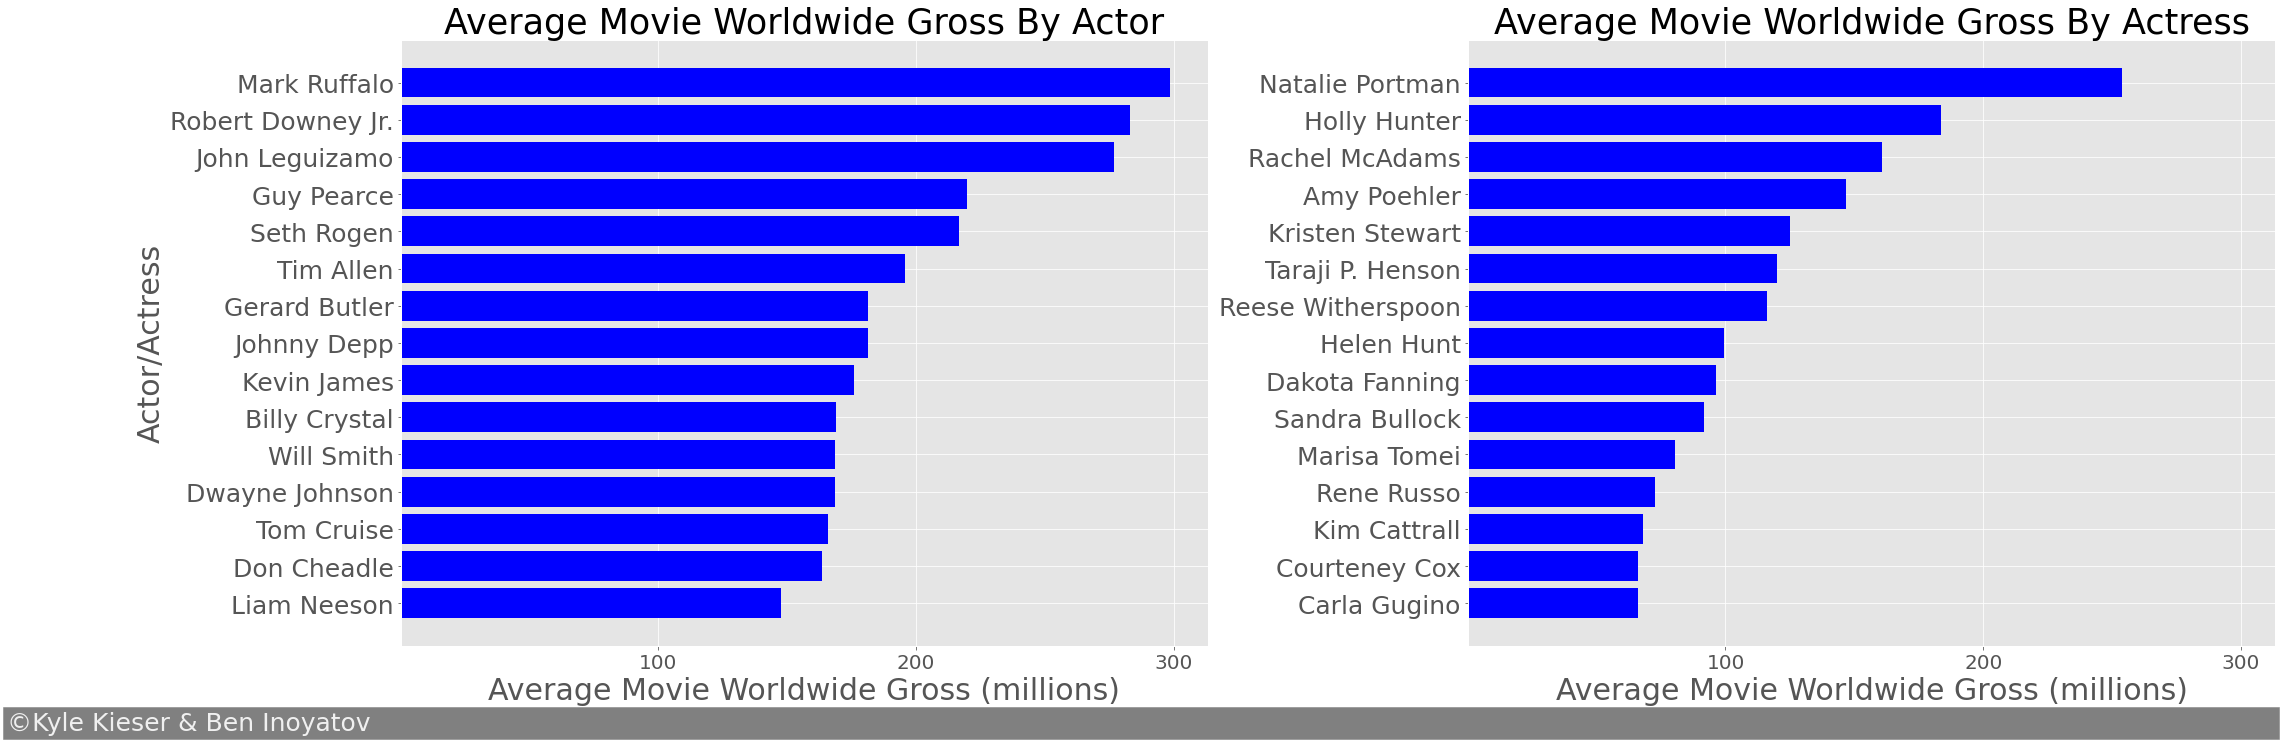

In [32]:
style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(30,10))

x = total.query("category == 'actor'")['name'].tail(15)
y = total.query("category == 'actor'")['mean'].tail(15)
ax1.set_title('Actors to Scout For')
ax1.barh(x, y, color='b')

a = total.query("category == 'actress'")['name'].tail(15)
b = total.query("category == 'actress'")['mean'].tail(15)
ax2.barh(a, b, color='b')

ax1.set_xlabel('Average Movie Worldwide Gross (millions)', fontsize=30)
ax1.set_title('Average Movie Worldwide Gross By Actor', fontsize=35)
ax2.set_title('Average Movie Worldwide Gross By Actress', fontsize=35)
ax2.set_xlabel('Average Movie Worldwide Gross (millions)', fontsize=30)
ax1.set_ylabel('Actor/Actress', fontsize=30)
ax1.set_xticks(np.linspace(150_000_000, 450_000_000, num=3), )
ax2.set_xticklabels([100,200,300], fontsize=20)
ax1.set_xticklabels([100,200,300], fontsize=20)
ax1.set_yticklabels(labels = x, fontsize=25)
ax2.set_yticklabels(labels = a, fontsize=25)
plt.tight_layout()
fig.text(x = -0.055, y = -0.02,
    s = '©Kyle Kieser & Ben Inoyatov                                                                                                                                                                                                                                              ',
         fontsize = 25, color = '#f0f0f0', backgroundcolor = 'gray');
fig.savefig('ASubplots.png', bbox_inches='tight');
plt.show();

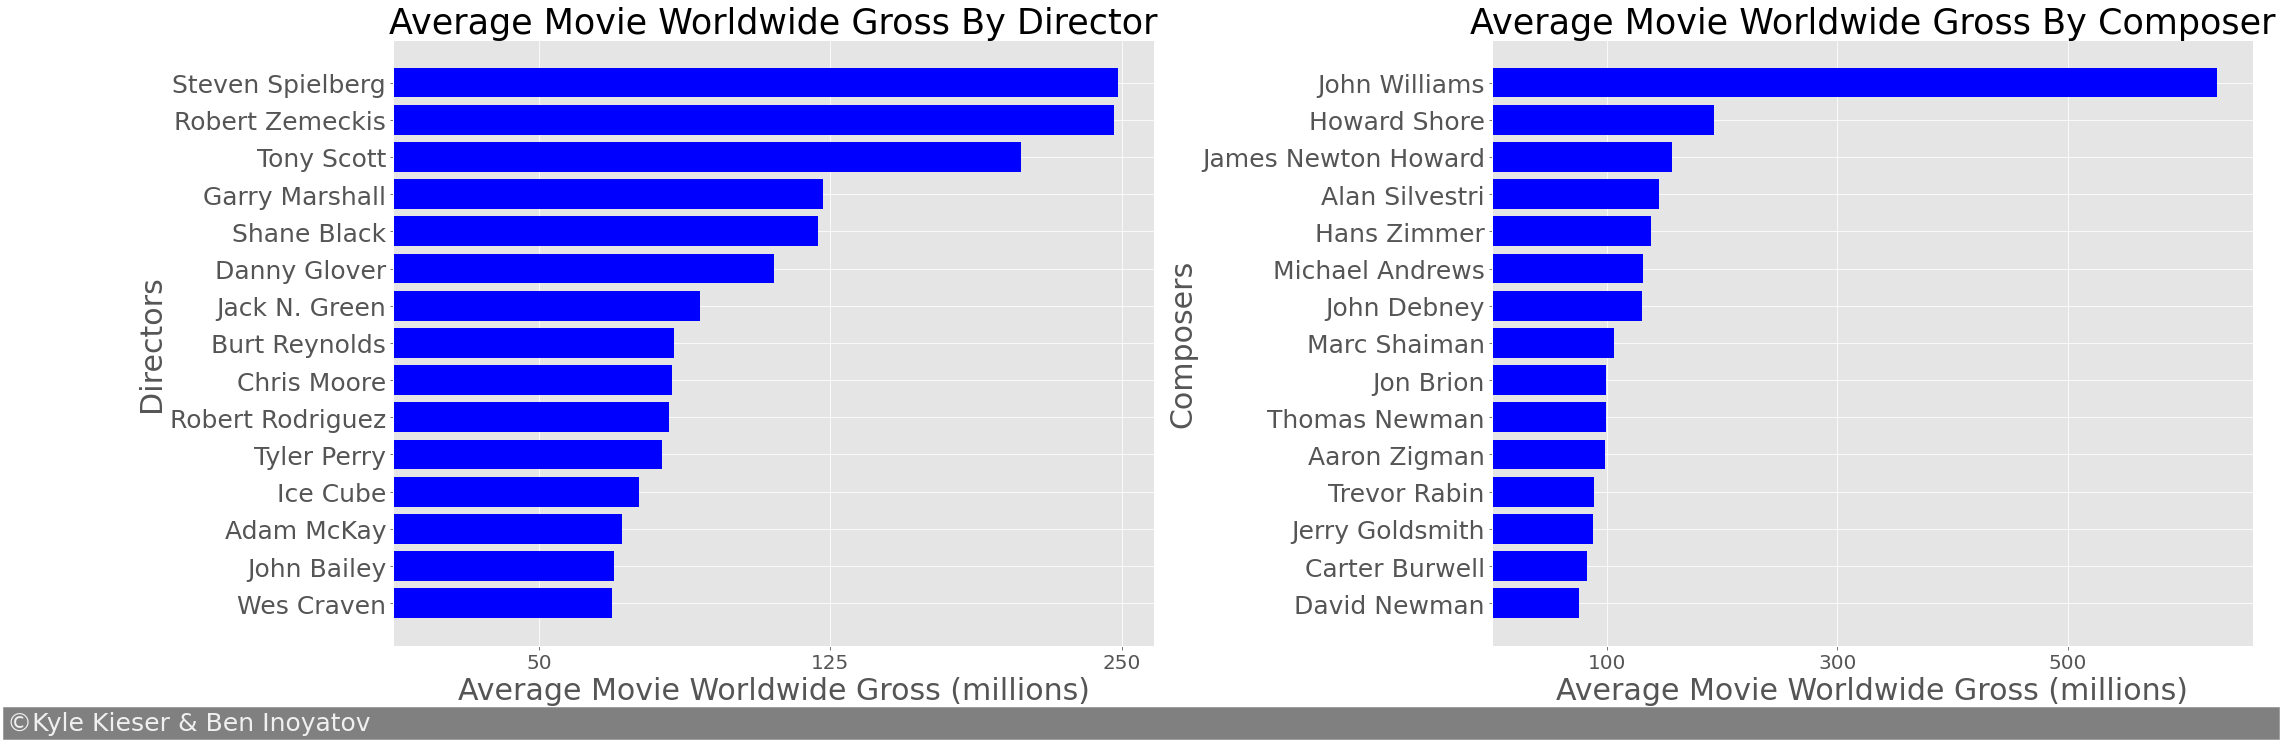

In [31]:
style.use('ggplot')

fig1, (ax3, ax4) = plt.subplots(1,2, figsize=(30,10))

i = total.query("category == 'director'")['name'].tail(15)
j = total.query("category == 'director'")['mean'].tail(15)
ax3.barh(i,j, color='blue')


f = total.query("category == 'composer'")['name'].tail(15)
g = total.query("category == 'composer'")['mean'].tail(15)
ax4.barh(f,g, color='blue')


ax3.set_xlabel('Average Movie Worldwide Gross (millions)',fontsize=30)
ax3.set_title('Average Movie Worldwide Gross By Director', fontsize=35)
ax4.set_title('Average Movie Worldwide Gross By Composer', fontsize=35)
ax4.set_xlabel('Average Movie Worldwide Gross (millions)', fontsize=30)
ax3.set_ylabel('Directors', fontsize=30)
ax4.set_ylabel('Composers', fontsize=30)
ax3.set_xticks(np.linspace(50_000_000, 250_000_000, num=3))
ax3.set_xticklabels([50,125,250], fontsize=20)
ax4.set_xticks(np.linspace(100_000_000, 500_000_000, num=3))
ax4.set_xticklabels([100, 300, 500], fontsize=20)
ax3.set_yticklabels(i, fontsize=25)
ax4.set_yticklabels(f, fontsize=25)
plt.tight_layout()
fig1.text(x = -0.055, y = -0.02,
    s = '©Kyle Kieser & Ben Inoyatov                                                                                                                                                                                                                                              ',
         fontsize = 25, color = '#f0f0f0', backgroundcolor = 'gray');
fig1.savefig('Director_Composer_Subplot.png');
plt.show();